In [1]:
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation
import seaborn as sns
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Load data
df = pd.read_csv(
    "Black python8.csv",
    usecols=['timestamp','trip', 'obs','vehicle', 'mode','city', 'city2', 'postbc2', 'route', 'route2', 'tunnel']
    ).rename(
        columns={
            'timestamp':'tstamp',
            'vehicle':'veh',
            'postbc2':'bc'
        }
).set_index('tstamp')

In [3]:
df.head()

,trip,obs,veh,mode,route,route2,city,city2,tunnel,bc
tstamp,,,,,,,,,,
2023-10-23 17:12,1,1,out,0,Outside,0,Montreal,1,0,1.05
2023-10-23 17:12,1,2,out,0,Outside,0,Montreal,1,0,1.33
2023-10-23 17:12,1,3,out,0,Outside,0,Montreal,1,0,0.96
2023-10-23 17:12,1,4,out,0,Outside,0,Montreal,1,0,1.20
2023-10-23 17:12,1,5,out,0,Outside,0,Montreal,1,0,1.37


In [4]:
n_by_trip = df.groupby('trip')['obs'].count()
n_by_trip.tail(10)

trip
170     34
171    354
172    162
173    200
174     32
175    292
176    272
177    310
178     74
179    414
Name: obs, dtype: int64

In [5]:
bc_by_trip = df.groupby('trip')['bc'].mean()
bc_by_trip.tail(10)

trip
170    1.845294
171    1.977627
172    5.385864
173    2.749450
174    2.623750
175    2.320719
176    1.735515
177    2.363903
178    1.604324
179    1.893599
Name: bc, dtype: float64

In [6]:
veh_trip = df.groupby('trip')['mode'].mean()
veh_trip.head(10)

trip
1     0.0
3     1.0
5     0.0
6     3.0
7     0.0
8     0.0
9     3.0
10    0.0
12    1.0
14    0.0
Name: mode, dtype: float64

In [7]:
route_trip = df.groupby('trip')['route2'].mean()
route_trip.head(10)

trip
1      0.0
3     21.0
5      0.0
6     20.0
7      0.0
8      0.0
9     20.0
10     0.0
12    21.0
14     0.0
Name: route2, dtype: float64

In [8]:
df1 = pd.concat([n_by_trip, bc_by_trip, veh_trip, route_trip], axis=1)

In [9]:
df1.head()

,obs,bc,mode,route2
trip,,,,
1,41,1.159756,0.0,0.0
3,174,6.836034,1.0,21.0
5,76,2.518421,0.0,0.0
6,161,2.749876,3.0,20.0
7,37,2.212162,0.0,0.0


In [10]:
avg_veh = df1.groupby('mode')['bc'].mean()
avg_veh.head(10)

mode
0.0     4.182935
1.0    15.388030
2.0     6.861879
3.0     7.128282
Name: bc, dtype: float64

In [11]:
veh2=df.groupby('mode')['bc'].mean()
veh2.head()

mode
0     4.064548
1    14.834872
2     5.900556
3     7.229179
Name: bc, dtype: float64

In [12]:
df1['mode'] = np.where(df1['mode'] == 0, 'Outside',
               np.where(df1['mode'] == 1, 'Subway',
               np.where(df1['mode'] == 2, 'BRT', 'Bus')))

df1['route2'] = np.where(df1['route2'] == 0, 'Outside',
               np.where(df1['route2'] == 6, 'BRT - L1',
               np.where(df1['route2'] == 8, 'BRT - L7',
               np.where(df1['route2'] == 9, 'R1 - Pue (Bus)',
               np.where(df1['route2'] == 10, 'R1 - Pue (BRT)',
               np.where(df1['route2'] == 11, 'R2 - Pue (BRT)',
               np.where(df1['route2'] == 12, 'R3 - Pue (Bus)',
               np.where(df1['route2'] == 13, 'R3 - Pue (BRT)',
               np.where(df1['route2'] == 14, 'Subway - M12 (elevated)',
               np.where(df1['route2'] == 15, 'Subway - M12 (tunnel)',
               np.where(df1['route2'] == 16, 'Subway - M2',
               np.where(df1['route2'] == 17, 'Subway - M2 (tunnel)',
               np.where(df1['route2'] == 18, 'Subway - M3',
               np.where(df1['route2'] == 19, 'Subway - M3 (tunnel)',
               np.where(df1['route2'] == 20, 'Bus - Mtl',
               np.where(df1['route2'] == 21, 'Subway - Green line', 
                        'BRT Pie-IX'))))))))))))))))

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 1 to 179
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   obs     108 non-null    int64  
 1   bc      108 non-null    float64
 2   mode    108 non-null    object 
 3   route2  108 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ KB


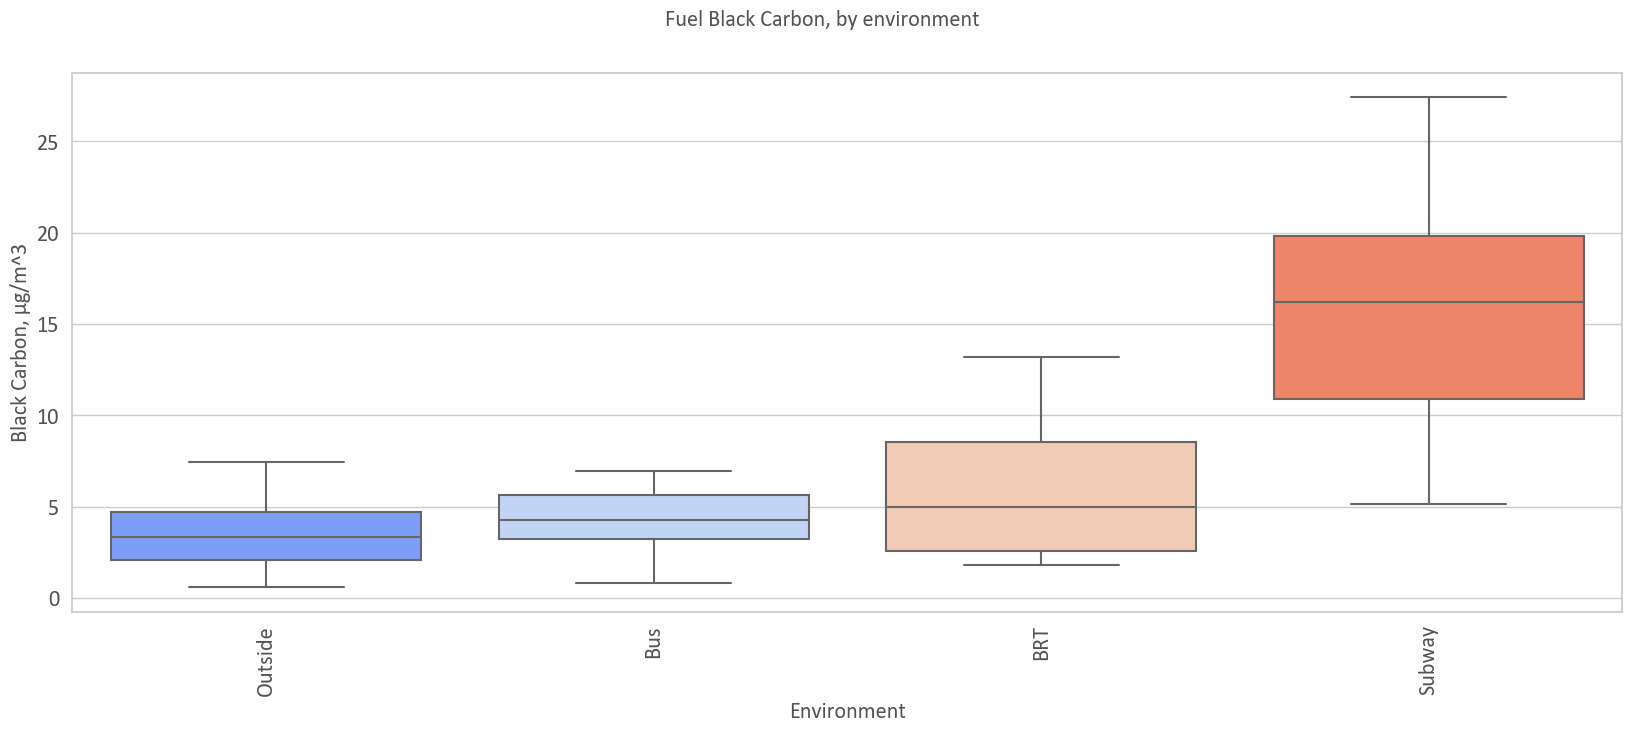

In [14]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11,4)})

bp = sns.set(style='whitegrid')
facecolor = 'white'
fig, ax = plt.subplots(figsize=(20, 7), facecolor=facecolor)

order = df1.groupby('mode')['bc'].median().sort_values().index

sns.boxplot(x='mode', y='bc', data=df1, showfliers=False, #showfliers turns on and off the outliers ticks
           #medianprops={"color":"coral"},
           palette='coolwarm',
           order=order,
           saturation=10)
font_color = '#525252'
csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Calibri'}

#plt.ylim([0, 100])
ax.set_ylabel('Black Carbon, \u00B5g/m^3', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
ax.set_xlabel('Environment', fontsize=16, color=font_color, **hfont)
plt.xticks(rotation=90)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)

title = 'Fuel Black Carbon, by environment'
fig.suptitle(title, y=.97, fontsize=16, color=font_color, **csfont)

filename = 'pet_veh_boxplot'
plt.savefig(filename+'.png', facecolor=facecolor)

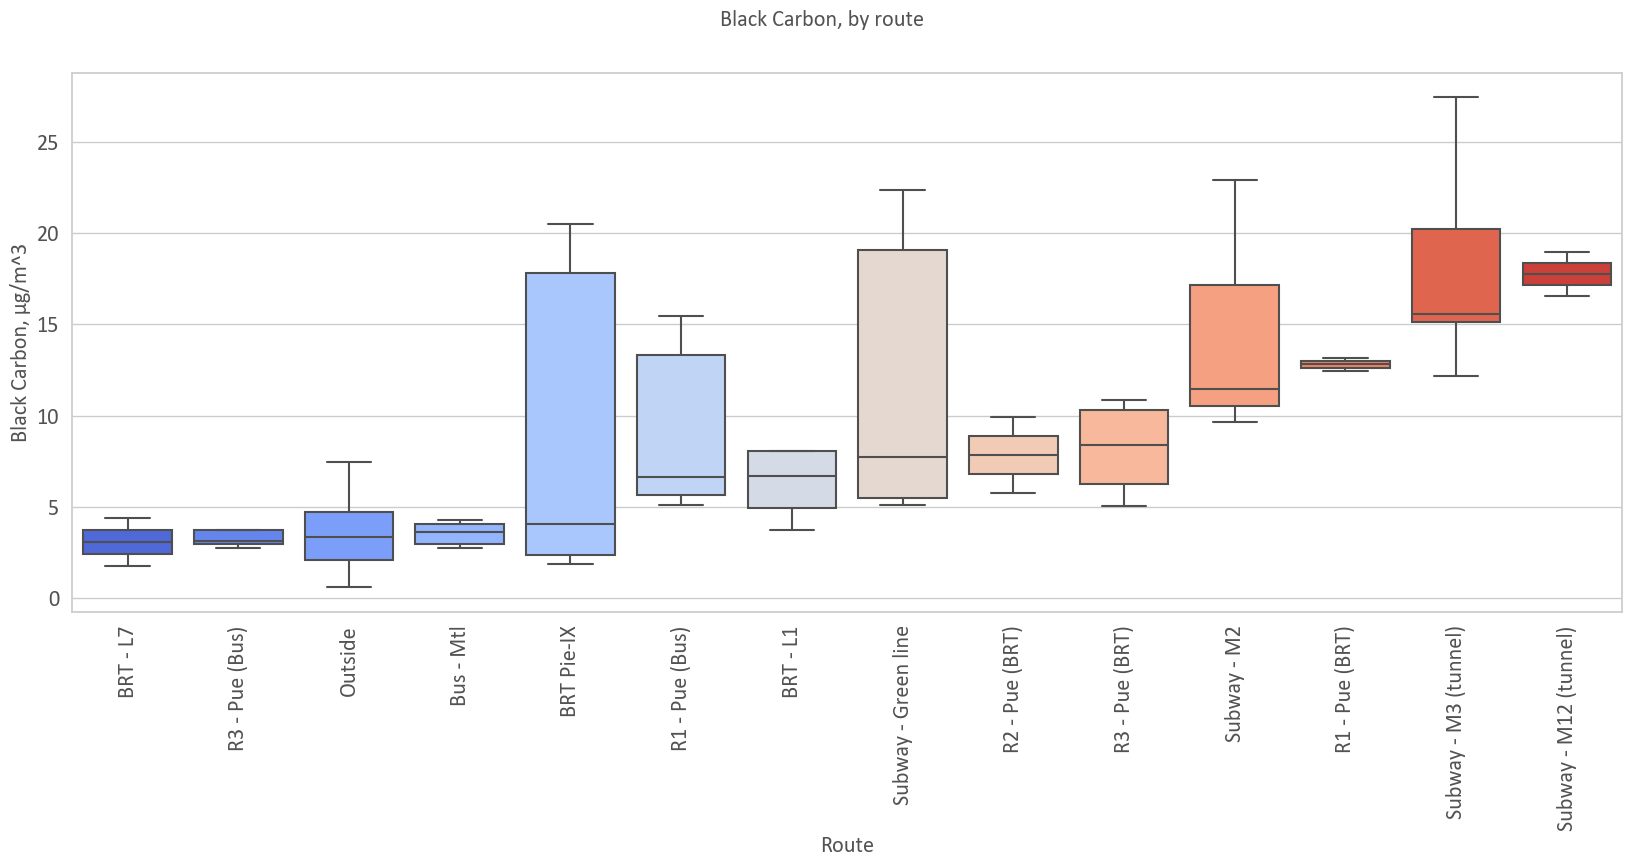

In [15]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11,4)})

bp = sns.set(style='whitegrid')
facecolor = 'white'
fig, ax = plt.subplots(figsize=(20, 7), facecolor=facecolor)

order = df1.groupby('route2')['bc'].median().sort_values().index

sns.boxplot(x='route2', y='bc', data=df1, showfliers=False, #showfliers turns on and off the outliers ticks
           #medianprops={"color":"coral"},
           palette='coolwarm',
           order=order,
           saturation=10)
font_color = '#525252'
csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Calibri'}

#plt.ylim([0, 100])
ax.set_ylabel('Black Carbon, \u00B5g/m^3', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
ax.set_xlabel('Route', fontsize=16, color=font_color, **hfont)
plt.xticks(rotation=90)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)

title = 'Black Carbon, by route'
fig.suptitle(title, y=.97, fontsize=16, color=font_color, **csfont)

filename = 'pet_veh_boxplot'
plt.savefig(filename+'.png', facecolor=facecolor)

In [16]:
df['mode'] = np.where(df['mode'] == 0, 'Outside',
               np.where(df['mode'] == 1, 'Subway',
               np.where(df['mode'] == 2, 'BRT', 'Bus')))

df['route2'] = np.where(df['route2'] == 0, 'Outside',
               np.where(df['route2'] == 6, 'BRT Mexico 1',
               np.where(df['route2'] == 8, 'BRT Mexico 7',
               np.where(df['route2'] == 9, 'Bus Puebla 1',
               np.where(df['route2'] == 10, 'BRT Puebla 1',
               np.where(df['route2'] == 11, 'BRT Puebla 2',
               np.where(df['route2'] == 12, 'Bus Puebla 3',
               np.where(df['route2'] == 13, 'BRT Puebla 3',
               np.where(df['route2'] == 14, 'Subway Elevated Mexico 12',
               np.where(df['route2'] == 15, 'Subway Tunnel Mexico 12',
               np.where(df['route2'] == 16, 'Subway Mexico 2',
               np.where(df['route2'] == 17, 'Subway Tunnel Mexico 2',
               np.where(df['route2'] == 18, 'Subway Mexico 3',
               np.where(df['route2'] == 19, 'Subway Tunnel Mexico 3',
               np.where(df['route2'] == 20, 'Bus Montreal',
               np.where(df['route2'] == 21, 'Subway Montreal', 
                        'BRT Montreal'))))))))))))))))

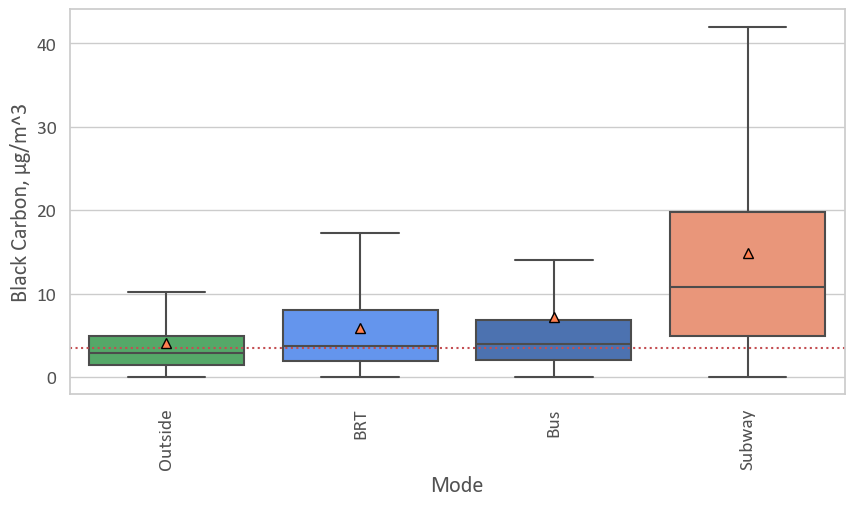

In [25]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(1,10)})

bp = sns.set(style='whitegrid')
facecolor = 'white'
fig, ax = plt.subplots(figsize=(10, 5), facecolor=facecolor)

order = df.groupby('mode')['bc'].median().sort_values().index

my_pal1 = {'Outside': 'g',
          'BRT': 'cornflowerblue',
          'Bus': 'b',
          'Subway': 'darksalmon'} 

sns.boxplot(x='mode', y='bc',  data=df, showfliers=False, showmeans='True', #showfliers turns on and off the outliers ticks
           meanprops={'markerfacecolor':'coral', 'markeredgecolor':'black', 'markersize':7},
           #medianprops={"color":"coral"},
           palette=my_pal1,
           order=order,
           saturation=10)
font_color = '#525252'
csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Calibri'}

#plt.ylim([0, 100])
ax.set_ylabel('Black Carbon, \u00B5g/m^3', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=14, color=font_color, **hfont)
    
ax.set_xlabel('Mode', fontsize=16, color=font_color, **hfont)
plt.xticks(rotation=90)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=14, color=font_color, **hfont)
ax.axhline(y=3.5, color='r', ls=':')

title = ''
fig.suptitle(title, y=.97, fontsize=14, color=font_color, **csfont)

filename = 'pet_veh_boxplot'
plt.savefig(filename+'.png', facecolor=facecolor)

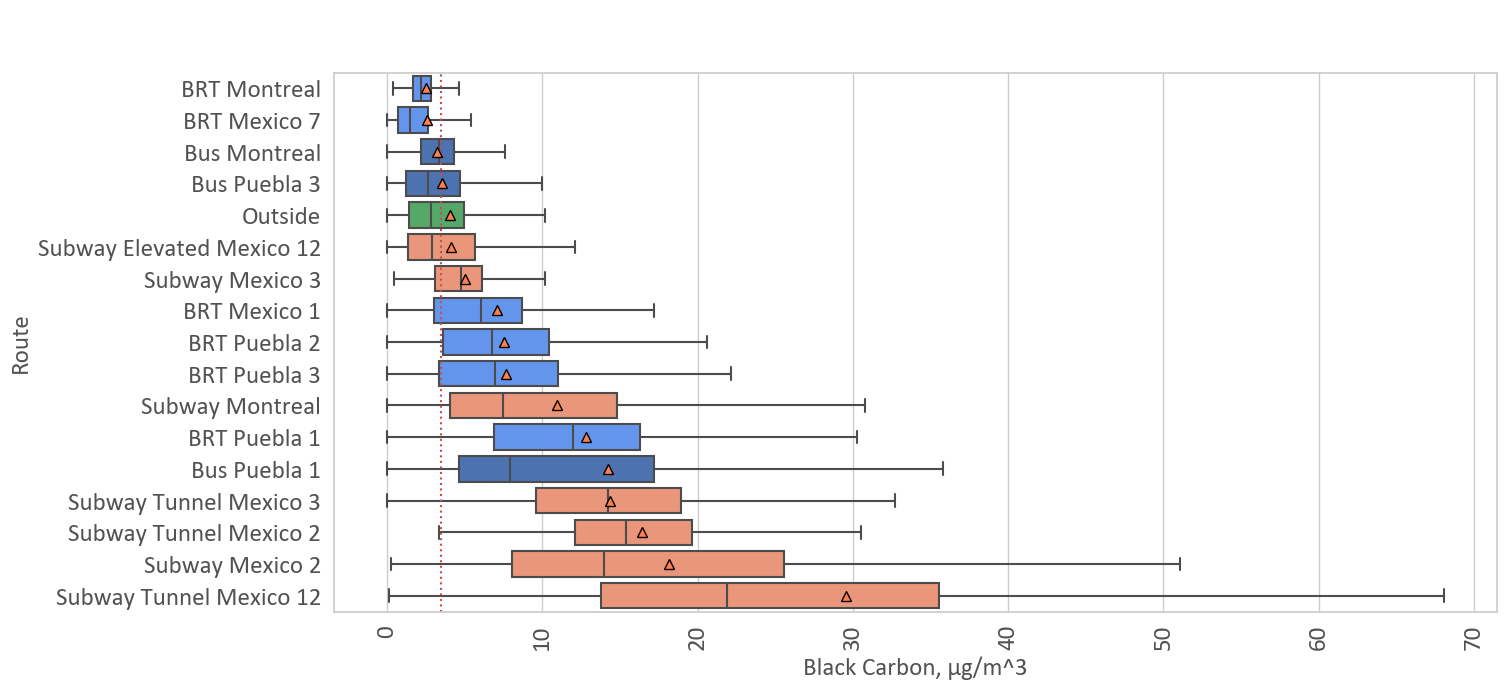

In [28]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20,4)})

bp = sns.set(style='whitegrid')
facecolor = 'white'
fig, ax = plt.subplots(figsize=(15, 7
                               ), facecolor=facecolor)

order = df.groupby('route2')['bc'].mean().sort_values().index

my_pal = {'Outside': 'g',
'BRT Mexico 1': 'cornflowerblue',
'BRT Mexico 7': 'cornflowerblue',
'Bus Puebla 1': 'b',
'BRT Puebla 1': 'cornflowerblue',
'BRT Puebla 2': 'cornflowerblue',
'Bus Puebla 3': 'b',
'BRT Puebla 3' : 'cornflowerblue',
'Subway Elevated Mexico 12': 'darksalmon',
'Subway Tunnel Mexico 12': 'darksalmon',
'Subway Mexico 2': 'darksalmon',
'Subway Tunnel Mexico 2': 'darksalmon',
'Subway Mexico 3': 'darksalmon',
'Subway Tunnel Mexico 3': 'darksalmon',
'Bus Montreal' : 'b',
'Subway Montreal': 'darksalmon',
'BRT Montreal': 'cornflowerblue'}

ax=sns.boxplot(y='route2', x='bc', data=df, showfliers=False, showmeans='True',#showfliers turns on and off the outliers ticks
           meanprops={'markerfacecolor':'coral', 'markeredgecolor':'black', 'markersize':7},
           #medianprops={"color":"coral"},
           palette=my_pal,
           order=order,
           saturation=10)
font_color = '#525252'
csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Calibri'}

#plt.ylim([0, 100])
ax.set_xlabel('Black Carbon, \u00B5g/m^3', fontsize=18, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=18, color=font_color, **hfont)
    
ax.set_ylabel('Route', fontsize=18, color=font_color, **hfont)
plt.xticks(rotation=90)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=18, color=font_color, **hfont)
ax.axvline(x=3.5, color='r', ls=':')

title = ' '
fig.suptitle(title, y=.97, fontsize=14, color=font_color, **csfont)

list(ax.patches)

filename = 'pet_veh_boxplot'
plt.savefig(filename+'.png', facecolor=facecolor)

In [19]:
list(ax.patches)

[]

In [20]:
df2 = df.copy()
df2.head()

,trip,obs,veh,mode,route,route2,city,city2,tunnel,bc
tstamp,,,,,,,,,,
2023-10-23 17:12,1,1,out,Outside,Outside,Outside,Montreal,1,0,1.05
2023-10-23 17:12,1,2,out,Outside,Outside,Outside,Montreal,1,0,1.33
2023-10-23 17:12,1,3,out,Outside,Outside,Outside,Montreal,1,0,0.96
2023-10-23 17:12,1,4,out,Outside,Outside,Outside,Montreal,1,0,1.20
2023-10-23 17:12,1,5,out,Outside,Outside,Outside,Montreal,1,0,1.37


In [21]:
df2 = df2.drop(df2.loc[df2['mode']!='Subway'].index)

In [22]:
df2.head() 

,trip,obs,veh,mode,route,route2,city,city2,tunnel,bc
tstamp,,,,,,,,,,
2023-10-23 17:17,3,1,metro,Subway,Subway - green line Mtl,Subway Montreal,Montreal,1,1,1.25
2023-10-23 17:17,3,2,metro,Subway,Subway - green line Mtl,Subway Montreal,Montreal,1,1,0.95
2023-10-23 17:17,3,3,metro,Subway,Subway - green line Mtl,Subway Montreal,Montreal,1,1,1.00
2023-10-23 17:17,3,4,metro,Subway,Subway - green line Mtl,Subway Montreal,Montreal,1,1,1.78
2023-10-23 17:17,3,5,metro,Subway,Subway - green line Mtl,Subway Montreal,Montreal,1,1,2.02


In [23]:
df2['tunnel'] = np.where(df2['tunnel'] == 0, 'Outside', 'Tunnel')

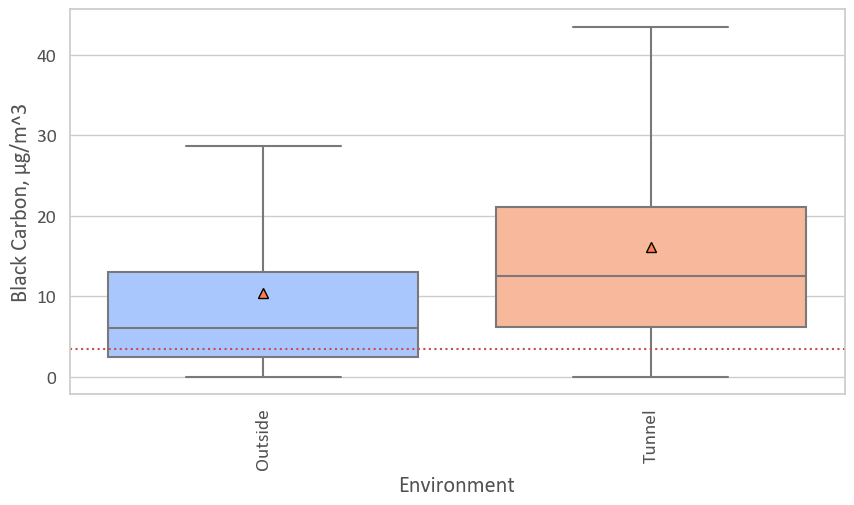

In [29]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(1,10)})

bp = sns.set(style='whitegrid')
facecolor = 'white'
fig, ax = plt.subplots(figsize=(10, 5), facecolor=facecolor)

order = df2.groupby('tunnel')['bc'].median().sort_values().index

sns.boxplot(x='tunnel', y='bc',  data=df2, showfliers=False, showmeans='True', #showfliers turns on and off the outliers ticks
           meanprops={'markerfacecolor':'coral', 'markeredgecolor':'black', 'markersize':7},
           #medianprops={"color":"coral"},
           palette='coolwarm',
           order=order,
           saturation=10)
font_color = '#525252'
csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Calibri'}

#plt.ylim([0, 100])
ax.set_ylabel('Black Carbon, \u00B5g/m^3', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=14, color=font_color, **hfont)
    
ax.set_xlabel('Environment', fontsize=16, color=font_color, **hfont)
plt.xticks(rotation=90)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=14, color=font_color, **hfont)
ax.axhline(y=3.5, color='r', ls=':')

title = ''
fig.suptitle(title, y=.97, fontsize=14, color=font_color, **csfont)

filename = 'pet_veh_boxplot'
plt.savefig(filename+'.png', facecolor=facecolor)